# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [40]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [41]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [42]:
# number of callbacks for black-sounding names
sum(data[data.race=='w'].call)

235.0

In [43]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [44]:
len(data)

4870

<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>

## 1: What test is appropriate for this problem? Does CLT apply?

One possible test we could use to test this is:

If we do a 2-sample z-test to see if the proportion of applicants accepted differs depending on the applicant had a white or black -sounding name.

The Central Limit Theorem (CLT) applies here, because we have at least 30 data points for white and black applicants each.

## 2: What are the null and alternate hypotheses?

H_o: There is no difference in the proportion of applicants accepted between those with white-sounding and black-sounding names.

H_a: There is a difference in the proportion of applicants accepted.

alpha = 0.05

In [45]:
w = data[data.race=='w']
b = data[data.race=='b']

## 3: Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.

In [46]:
print(len(w), len(b))

(2435, 2435)


In [47]:
w_mean = w['call'].mean()
w_std = w['call'].std()/np.sqrt(len(w))
print(w_mean, w_std)

(0.09650924056768417, 0.005985230735411586)


In [48]:
b_mean = b['call'].mean()
b_std = b['call'].std()/np.sqrt(len(b))
print(b_mean, b_std)

(0.0644763857126236, 0.004978131054326431)


For the frequentist approach, use a 2-sample z-test for the difference of proportions.

The std functions above calculate the std assuming it is a proportion, using the formula sqrt(p(1-p)). Since it is a sample, we divide it by the square root of the size of the sample to get our estimate.

In [49]:
total_std = np.sqrt(w_std**2 + b_std**2)
total_std

0.007784906919813794

In [50]:
z_stat = (w_mean - b_mean)/total_std
z_stat

4.114738324427746

In [51]:
print("The probability of getting this z-score of " + str(z_stat) + 
     " is less than 0.0002, which corresponds to a z-score of +/- 3.49.")

The probability of getting this z-score of 4.114738324427746 is less than 0.0002, which corresponds to a z-score of +/- 3.49.


This is our 95% confidence interval for the true difference of the means in acceptance rates of people with white-sounding and black-sounding names.

In [52]:
print("Our 95% confidence interval is " + str(w_mean - b_mean - 2 * total_std) + " to " +
      str(w_mean - b_mean + 2 * total_std))

Our 95% confidence interval is 0.01646304101543299 to 0.04760266869468817


In [53]:
print("The margin of error is " + str(2 * total_std))

The margin of error is 0.015569813839627588


For the bootstrap approach, we can resample each the b and w 'call' series to get bootstrap samples, and calculate the difference between their means.

In [54]:
bootstrap_mean_diffs = []
for _ in range(10000):
    b_bootstrap = np.random.choice(b['call'], len(b))
    w_bootstrap = np.random.choice(w['call'], len(w))
    bootstrap_mean_diffs.append(np.mean(w_bootstrap) - np.mean(b_bootstrap))

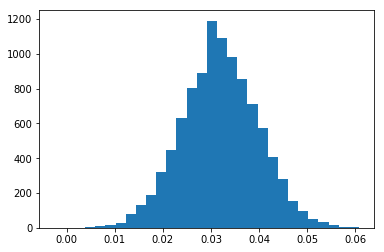

In [55]:
_ = plt.hist(bootstrap_mean_diffs, bins=30)

In [56]:
np.min(bootstrap_mean_diffs)

-0.002464071

In [57]:
len(np.where(np.array(bootstrap_mean_diffs) <= 0))/(1.0 * len(bootstrap_mean_diffs))

0.0001

In [58]:
bootstrap_mean_diffs[np.where(np.array(bootstrap_mean_diffs) <= 0)[0][0]]

-0.002464071

The bootstrap method, with 10000 repetitions, yielded just 1 scenario where the proportion of applicants with black-sounding names had as good of or a greater chance of getting a callback when compared to their white-sounding-name counterparts. This gives a p-value of 0.0001.

<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>

## 4: Write a story describing the statistical significance in the context or the original problem.

Two tests were performed to compare the likelihood of getting the different callback rates for applicants with white-sounding and black-sounding names, 0.0965 and 0.0644, respectively.

The frequentist test found that this difference has a p-value of less than 0.0002, while the bootstrap test found a p-value of 0.0001. 

Both tests agree that it is enormously unlikely that this difference is due to chance, and that employers likely have bias against black-sounding names.

## 5: Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

For Q5, do a covariance matrix with Seaborn to help show some correlations.

This analysis does not consider any factors other than race. It shows that there is definitely an impact on callback rate depending on if your name sounds more white or black. Thus, we definitely cannot yet say if this is the most important factor in callback success.

One way we could begin to answer this question is with a Seaborn covariance matrix.

We should consider factors like education, job experience, and gender in a future analysis, and see what the differing rates of callbacks are. Only then could we claim that one factor is the most important in callback success.